In [11]:
from numpy import random
import numpy as np
x = random.zipf(a=2, size=(2, 3))
print(x)

[[605   2   1]
 [  3   2   1]]


C:\Users\Dell\AppData\Local\Temp\ipykernel_14100\2637396808.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[x<10], kde=False)


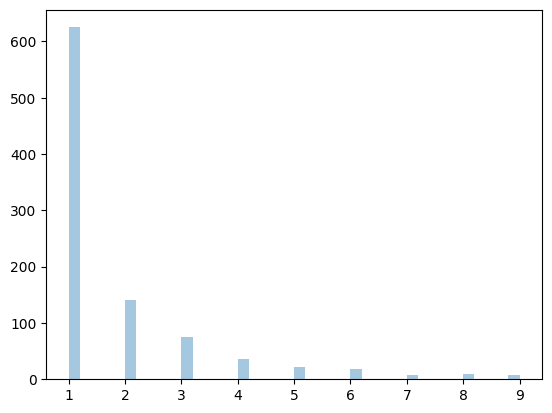

In [12]:
# visualization

import matplotlib.pyplot as plt
import seaborn as sns

x = random.zipf(a=2, size=1000)
sns.distplot(x[x<10], kde=False)
plt.show()

Total words: 127319
Total unique words: 8594


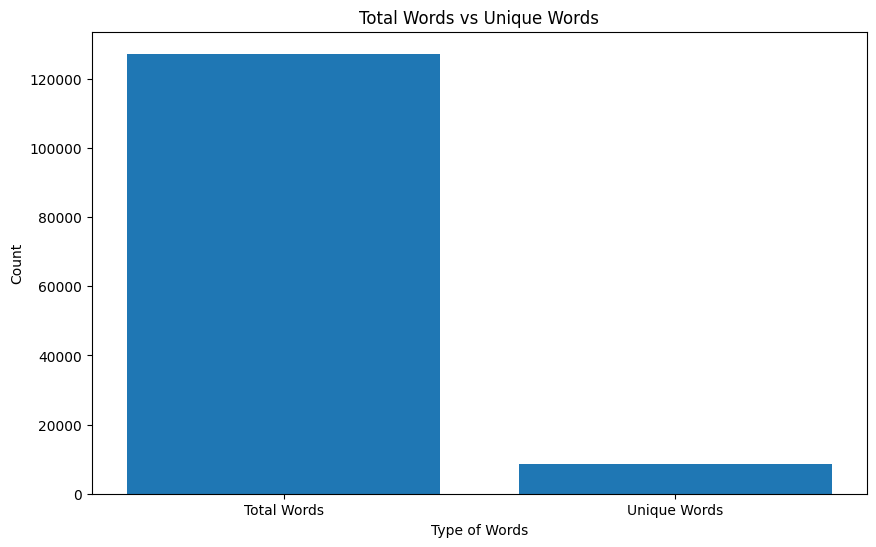

In [35]:
# question

import requests
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# get the text from the website
url = 'https://www.gutenberg.org/files/1342/1342-0.txt'
response = requests.get(url)
text = response.text

# cleaning the text
text = text.lower()
# remove punctuation
text = re.sub(r'[^\w\s]', '', text)
words = text.split()

# count the frequency of each word
total_words = len(words)
print(f"Total words: {total_words}")
word_freq = Counter(words)
print(f"Total unique words: {len(word_freq)}")

# plot the total words and unique words
plt.figure(figsize=(10, 6))
plt.bar(["Total Words", "Unique Words"], [total_words, len(word_freq)])
plt.xlabel("Type of Words")
plt.ylabel("Count")
plt.title("Total Words vs Unique Words")
plt.show()




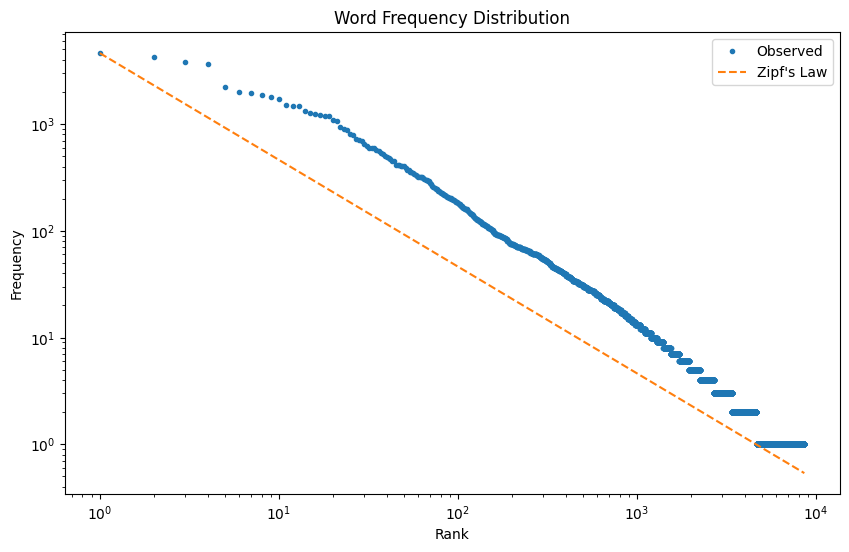

In [36]:
# ranking words by frequency
ranked_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
ranks = range(1, len(ranked_words) + 1)

frequencies = [word[1] for word in ranked_words]

# plot observed
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker=".", linestyle="none", label="Observed")


# plot the Zipf's  distribution
zipf_frequencies = [frequencies[0] / rank for rank in ranks]
plt.loglog(ranks, zipf_frequencies, linestyle="--", label="Zipf's Law")

plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution")
plt.legend()
plt.show()


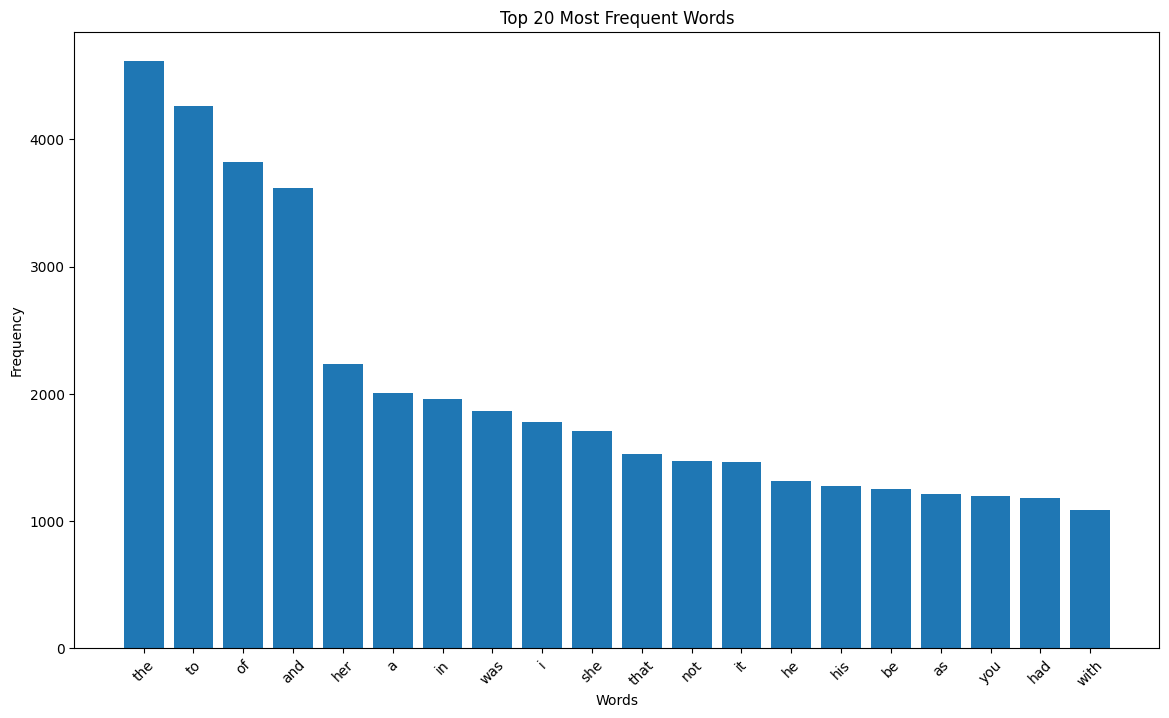

In [40]:
import wordcloud

top_n = 20
top_words = ranked_words[:top_n]

plt.figure(figsize=(14, 8))
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title(f"Top {top_n} Most Frequent Words")
plt.xticks(rotation=45)
plt.show()

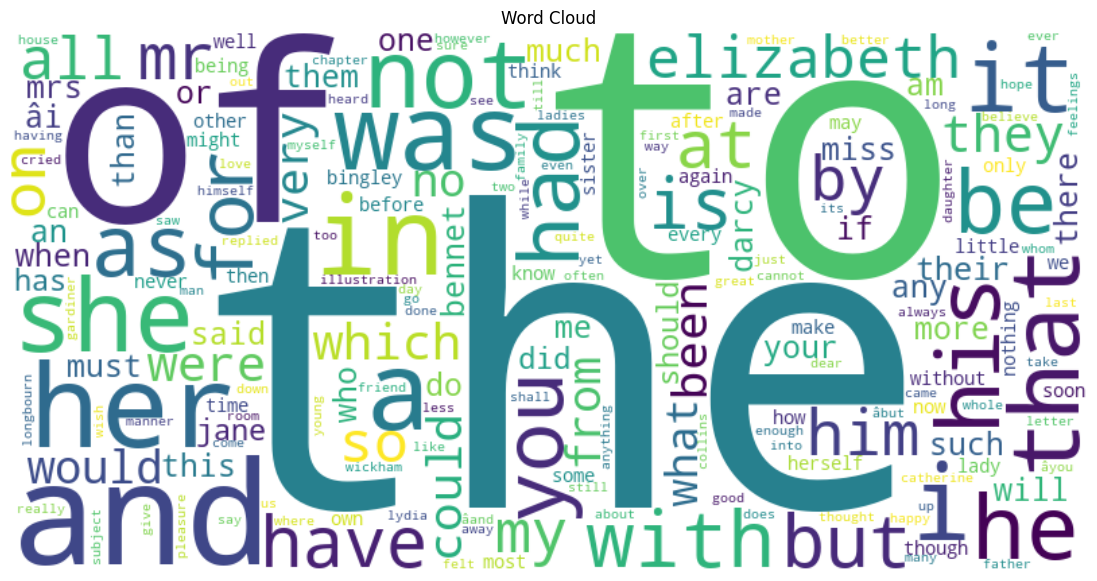

In [44]:
import wordcloud

wordcloud = wordcloud.WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud")
plt.show()

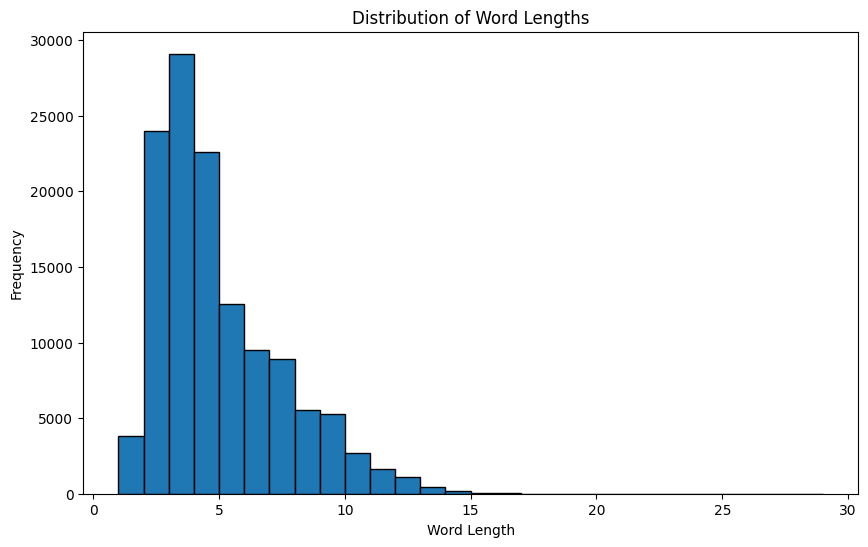

In [49]:
# Histogram of word lengths

word_lengths = [len(word) for word in words]
plt.figure(figsize=(10, 6))
plt.hist(word_lengths, bins=range(1, max(word_lengths) + 1), edgecolor='black')
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.title("Distribution of Word Lengths")
plt.show()
